<a href="https://colab.research.google.com/github/swat90/FastSAM_geosptialdata/blob/main/FastGeoSAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install the required libraries fro Geo FastSAM

Reference link:https://samgeo.gishub.org/examples/fast_sam/

In [ ]:
!pip install segment-geospatial segment-anything-fast

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.2/52.2 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 40.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 69.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.0/96.0 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 72.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.2/40.2 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 51.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 54.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.0/612.0 kB 48.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 65.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.9/91.9 kB 13.3 MB/s eta 0:

Import the packages

In [ ]:
import leafmap
from samgeo import tms_to_geotiff
from samgeo.fast_sam import SamGeo

Convert the coordinates to visulize on map using coordinate reference system (CRS) from QGIS

In [ ]:
from pyproj import Proj, transform

# Convert the coordinates
x = -6246937.4
y = -4147752.5
in_proj = Proj(init='epsg:3857')
out_proj = Proj(init='epsg:4326')
lon, lat = transform(in_proj, out_proj, x, y)

print(lat, lon)

-34.881230248150935 -56.11719345357864


Create an interactive map from above coordiantes

In [55]:
m = leafmap.Map(center=[-34.8812, -56.1172], zoom=18, height="800px")
m.add_basemap("SATELLITE")
m

Map(center=[-34.8812, -56.1172], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', '…

Convert all the other coordinates of my merged 3*3 image using QGIS

In [ ]:
from pyproj import Proj, transform

# Convert the first set of coordinates
x1 = -4147597.8316
y1 = -4147758.3494
lon1, lat1 = transform(Proj(init='epsg:3857'), Proj(init='epsg:4326'), x1, y1)

print("First set of coordinates (lat, lon):", lat1, lon1)

# Convert the second set of coordinates
x2 = -6247100.6551
y2 = -6246798.7582
lon2, lat2 = transform(Proj(init='epsg:3857'), Proj(init='epsg:4326'), x2, y2)

print("Second set of coordinates (lat, lon):", lat2, lon2)

First set of coordinates (lat, lon): -34.88127335373105 -37.25850524507265
Second set of coordinates (lat, lon): -48.83433879485329 -56.11865999909405


Pan and zoom the map to select the area of interest. Use the draw tools to draw a polygon or rectangle on the map.

First create a box with above 4 coordinates of merged 3*3 image

In [ ]:
bbox = m.user_roi_bounds()
if bbox is None:
    bbox = [-56.11865999909405, -48.83433879485329, -37.25850524507265, -34.88127335373105]

Define the image path

In [57]:
image = "/content/drive/MyDrive/preprocessed/merge9.tif"

Add layer to map

In [58]:
m.layers[-1].visible = False
m.add_raster(image, layer_name="Image")
m

Map(bottom=40500573.0, center=[-34.8812, -56.1172], controls=(ZoomControl(options=['position', 'zoom_in_text',…

Initialize SamGeo class

In [53]:
from samgeo.fast_sam import SamGeo

sam = SamGeo(model="FastSAM-x.pt")


Set the image

In [61]:
sam.set_image("/content/drive/MyDrive/preprocessed/merge9.png", imgsz=768, conf=0.25, iou=0.70)


image 1/1 /content/drive/MyDrive/preprocessed/merge9.png: 768x768 228 objects, 99.3ms
Speed: 2.5ms preprocess, 99.3ms inference, 11.7ms postprocess per image at shape (1, 3, 768, 768)


Segment the image with everything_prompt

In [62]:
sam.everything_prompt(output="mask.tif")

Show the annotated image.

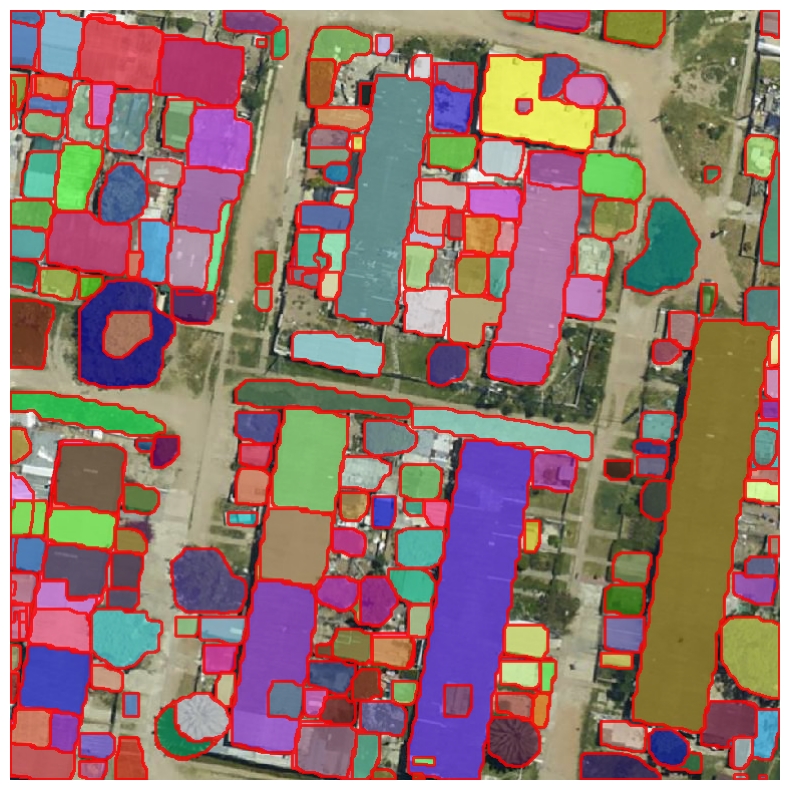

In [63]:
sam.show_anns("mask.png")
#can also use sam.show_anns("mask.tif")

Use text prompt to get only buildings

In [64]:
sam.text_prompt(text="segment_all_buildings", output="mask1.tif")

Show the segmented image

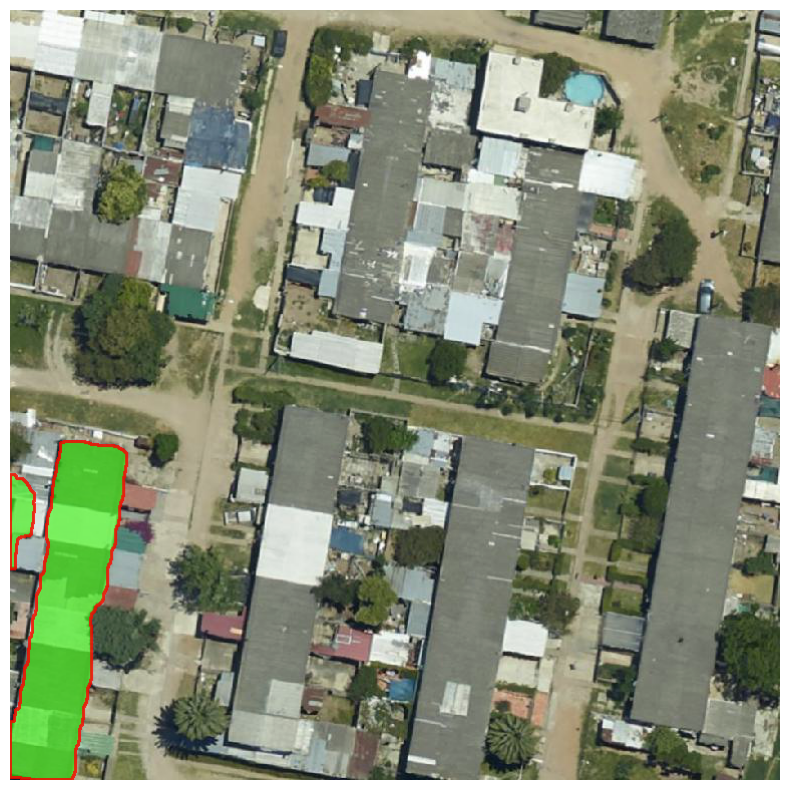

In [65]:
sam.show_anns("mask1.tif")

Tried with various text prompts like "all_buildings", all_apartments", "all_rooftops", "each_building" and many others, only one building is identified each time.

Let's try with a single image and repeat all the above steps

In [79]:
sam.set_image("/content/drive/MyDrive/preprocessed/chips/OAM-360832-632814-20.tif", imgsz=256, conf=0.30, iou=0.70)


image 1/1 /content/drive/MyDrive/preprocessed/chips/OAM-360832-632814-20.tif: 256x256 28 objects, 28.7ms
Speed: 0.8ms preprocess, 28.7ms inference, 4.5ms postprocess per image at shape (1, 3, 256, 256)


In [73]:
sam.everything_prompt(output="mask_single.tif")

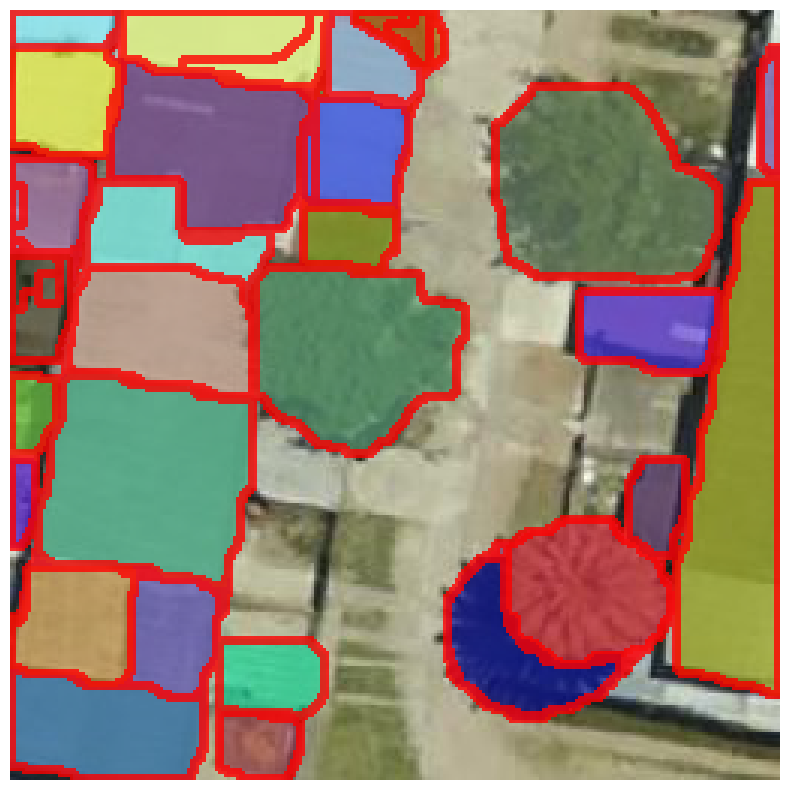

In [74]:
sam.show_anns("mask_single.tif")

In [82]:
sam.text_prompt(text="all_rooftops", output="mask_single_text.tif")

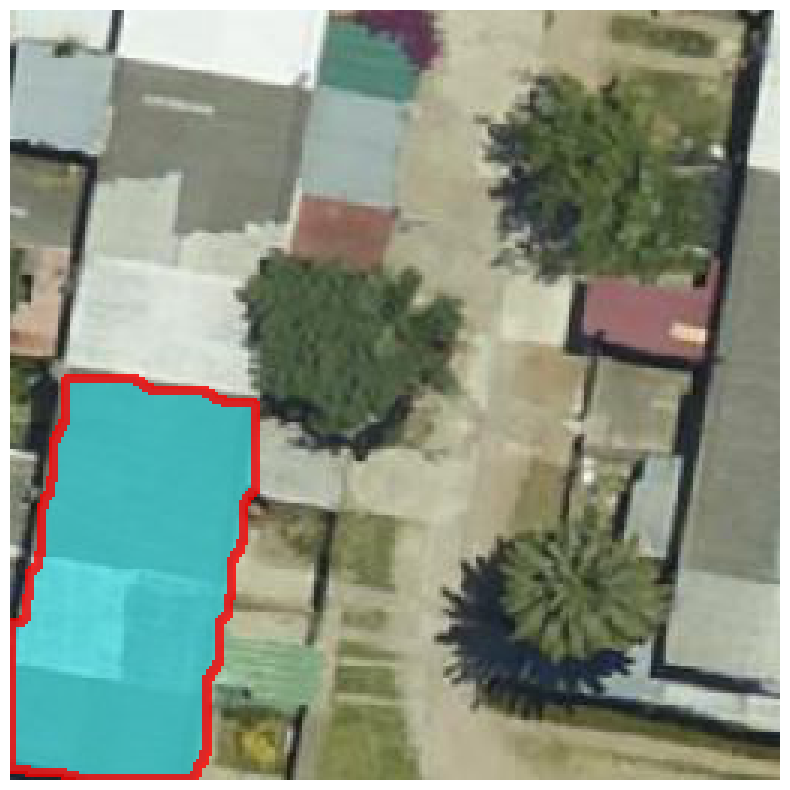

In [83]:
sam.show_anns("mask_single_text.tif")